In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import json
import uuid
import pathlib

from unityagents import UnityEnvironment
import pandas as pd

from drl_ctrl import control
from drl_ctrl import scores_util as su
from drl_ctrl import path_util as pu

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/home/hm/anaconda3/envs/drlnd/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
tuning_output_dir = pathlib.Path("../training_output/tuning_ddpg")
agent_type = 'DDPG'

In [3]:
default_params = {
    "n_episodes": 500,
    "update_every": 10,
    "num_updates": 20,
    "buffer_size": 100_000,
    "batch_size": 128,
    "gamma_discount_factor": 0.95,
    "mean_score_threshold": 30.0,
    "max_t": 1000,
    "learning_rate_actor": 2e-3,
    "learning_rate_critic": 1e-3,
    "tau_soft_update": 1e-3,
    "l2_weight_decay": 0,
    "has_ou_noise": True,
    "ou_noise_mu": 0.0,
    "ou_noise_theta": 0.15,
    "ou_noise_sigma": 0.1,
    "agent_seed": 11_111,
    "logging_freq": 1,
}

In [4]:
candidate_params = [
    {
        "update_every": 10,
        "num_updates": 20,
        "ou_noise_sigma": 0.1,
    },
    {
        "update_every": 20,
        "num_updates": 10,
        "ou_noise_sigma": 0.1,
    },
    {
        "update_every": 20,
        "num_updates": 10,
        "ou_noise_sigma": 0.75,
    },
    {
        "update_every": 20,
        "num_updates": 10,
        "ou_noise_sigma": 0.75,
    },
    {
        "update_every": 10,
        "num_updates": 20,
        "ou_noise_sigma": 0.1,
    },
    {
        "update_every": 20,
        "num_updates": 10,
        "ou_noise_sigma": 0.1,
    },
    {
        "update_every": 10,
        "num_updates": 20,
        "ou_noise_sigma": 0.1,
        "gamma_discount_factor": 0.99
    },
    {
        "update_every": 20,
        "num_updates": 10,
        "ou_noise_sigma": 0.1,
        "gamma_discount_factor": 0.99
    },
]

In [5]:
env = UnityEnvironment(file_name="../Reacher20_Linux/Reacher.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
for i, p in enumerate(candidate_params):
    training_params = {**default_params, **p}
    print(training_params)
    u_name = str(uuid.uuid4())
    out_dir = tuning_output_dir.joinpath(u_name)
    out_dir.mkdir(parents=True, exist_ok=True)
    with open(out_dir.joinpath("training_params.json"), "w") as f:
        json.dump(training_params, f, indent=2)
        
    control.training(env, out_dir, **training_params)
    
    df_scores = su.read_scores(out_dir)
    p_scores = su.plot_scores(df_scores, f"DDPG agent #{i}")
    print(p_scores)

INFO:drl_ctrl.control:Ensuring output directory exists: ../training_output/tuning_ddpg/394b0ed4-69cb-4260-ae85-67ca73668c18


{'n_episodes': 500, 'update_every': 10, 'num_updates': 20, 'buffer_size': 100000, 'batch_size': 128, 'gamma_discount_factor': 0.95, 'mean_score_threshold': 30.0, 'max_t': 1000, 'learning_rate_actor': 0.002, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.001, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma': 0.1, 'agent_seed': 111111, 'logging_freq': 1}


Episode 1	Average Score: 0.86
Episode 2	Average Score: 0.77
Episode 3	Average Score: 0.85
Episode 4	Average Score: 0.98
Episode 5	Average Score: 1.24
Episode 6	Average Score: 1.47
Episode 7	Average Score: 1.78
Episode 8	Average Score: 1.97
Episode 9	Average Score: 2.28
Episode 10	Average Score: 2.62
Episode 11	Average Score: 2.88
Episode 12	Average Score: 3.57
Episode 13	Average Score: 4.61
Episode 14	Average Score: 5.66
Episode 15	Average Score: 6.76
Episode 16	Average Score: 8.03
Episode 17	Average Score: 9.24
Episode 18	Average Score: 10.74
Episode 19	Average Score: 12.18
Episode 20	Average Score: 13.51
Episode 21	Average Score: 14.73
Episode 22	Average Score: 15.77
Episode 23	Average Score: 16.74
Episode 24	Average Score: 17.52
Episode 25	Average Score: 18.27
Episode 26	Average Score: 19.00
Episode 27	Average Score: 19.72
Episode 28	Average Score: 20.35
Episode 29	Average Score: 20.90
Episode 30	Average Score: 21.44
Episode 31	Average Score: 21.96
Episode 32	Average Score: 22.40
Ep

NameError: name 'output_dir' is not defined

In [9]:
best_params_so_far = {
 'n_episodes': 500,
 'update_every': 10,
 'num_updates': 20,
 'buffer_size': 100000,
 'batch_size': 128,
 'gamma_discount_factor': 0.95,
 'mean_score_threshold': 30.0,
 'max_t': 1000,
 'learning_rate_actor': 0.002,
 'learning_rate_critic': 0.001,
 'tau_soft_update': 0.001,
 'l2_weight_decay': 0,
 'has_ou_noise': True,
 'ou_noise_mu': 0.0,
 'ou_noise_theta': 0.15,
 'ou_noise_sigma': 0.1,
 'agent_seed': 111111,
 'logging_freq': 1}

output_dir = '../training_output/tuning_ddpg/394b0ed4-69cb-4260-ae85-67ca73668c18'

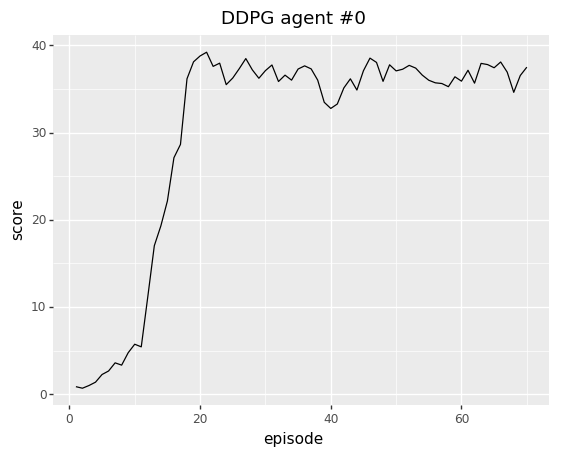

<ggplot: (8766991731425)>


In [7]:
df_scores = su.read_scores(out_dir)
p_scores = su.plot_scores(df_scores, f"DDPG agent #{i}")
print(p_scores)

In [ ]:
env.close()